In [8]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import matplotlib.patches as patches
from PIL import Image, ImageDraw
from scipy import misc
import re
import random
import sys
from tqdm import tqdm

%matplotlib inline

In [9]:
!ls ./SynthText/

1    110  122  134  146  158  17   181	193  24  36  48  6   71  83  95
10   111  123  135  147  159  170  182	194  25  37  49  60  72  84  96
100  112  124  136  148  16   171  183	195  26  38  5	 61  73  85  97
101  113  125  137  149  160  172  184	196  27  39  50  62  74  86  98
102  114  126  138  15	 161  173  185	197  28  4   51  63  75  87  99
103  115  127  139  150  162  174  186	198  29  40  52  64  76  88  gt.mat
104  116  128  14   151  163  175  187	199  3	 41  53  65  77  89
105  117  129  140  152  164  176  188	2    30  42  54  66  78  9
106  118  13   141  153  165  177  189	20   31  43  55  67  79  90
107  119  130  142  154  166  178  19	200  32  44  56  68  8	 91
108  12   131  143  155  167  179  190	21   33  45  57  69  80  92
109  120  132  144  156  168  18   191	22   34  46  58  7   81  93
11   121  133  145  157  169  180  192	23   35  47  59  70  82  94


In [10]:
import scipy.io
gt_mat = scipy.io.loadmat('./SynthText/gt.mat')
gt_mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Apr 14 23:08:01 2016',
 '__version__': '1.0',
 '__globals__': [],
 'charBB': array([[array([[[423.161264, 439.608473, 450.66888 , 466.319764, ..., 132.205451, 110.016737, 120.831446, 131.358857],
         [438.299757, 452.612884, 466.319764, 482.225857, ..., 142.472687, 120.133195, 133.079763, 144.759193],
         [435.548954, 449.957972, 464.584879, 480.682359, ..., 140.974211, 118.617798, 131.340191, 143.256882],
         [420.179467, 436.741502, 448.748966, 464.584879, ..., 130.70149 , 108.496128, 119.084442, 129.849355]],
 
        [[ 22.269589,  21.605592,  27.024197,  27.257477, ...,   8.219988,  35.66412 ,  29.179457,  36.006609],
         [ 22.460756,  21.763919,  27.257477,  27.49456 , ...,   8.268565,  35.826465,  29.342662,  36.221652],
         [ 40.1574  ,  40.472414,  40.792192,  41.14412 , ...,  22.745672,  50.25232 ,  46.056925,  50.793452],
         [ 39.821388,  40.183472,  40.445982,  40.792192,

In [11]:
# print(gt_mat.shape)
gt_mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'charBB', 'wordBB', 'imnames', 'txt'])

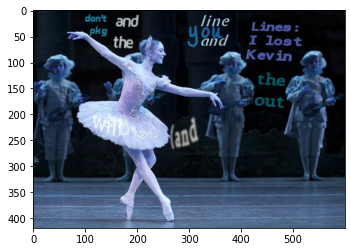

In [12]:
ROOT_PATH = "./SynthText/"
img = cv2.imread(ROOT_PATH+"8/ballet_106_0.jpg")


plt.imshow(img)

In [13]:
gt_mat['imnames'][0][0]

array(['8/ballet_106_0.jpg'], dtype='<U18')

In [14]:
gt_mat['txt'][0][0]

array(['Lines:\nI lost\nKevin ', 'will                ', 'line\nand            ', 'and\nthe             ',
       '(and                ', 'the\nout             ', 'you                 ', "don't\n pkg          "], dtype='<U20')

In [15]:
gt_mat['charBB'][0][0]

array([[[423.161264, 439.608473, 450.66888 , 466.319764, ..., 132.205451, 110.016737, 120.831446, 131.358857],
        [438.299757, 452.612884, 466.319764, 482.225857, ..., 142.472687, 120.133195, 133.079763, 144.759193],
        [435.548954, 449.957972, 464.584879, 480.682359, ..., 140.974211, 118.617798, 131.340191, 143.256882],
        [420.179467, 436.741502, 448.748966, 464.584879, ..., 130.70149 , 108.496128, 119.084442, 129.849355]],

       [[ 22.269589,  21.605592,  27.024197,  27.257477, ...,   8.219988,  35.66412 ,  29.179457,  36.006609],
        [ 22.460756,  21.763919,  27.257477,  27.49456 , ...,   8.268565,  35.826465,  29.342662,  36.221652],
        [ 40.1574  ,  40.472414,  40.792192,  41.14412 , ...,  22.745672,  50.25232 ,  46.056925,  50.793452],
        [ 39.821388,  40.183472,  40.445982,  40.792192, ...,  22.636718,  50.030025,  45.810092,  50.498992]]])

In [16]:
gt_mat['wordBB'][0][0]


array([[[420.58957 , 418.85016 , 448.08478 , 410.3094  , ..., 427.52274 , 296.86508 ,  99.56819 , 108.96211 ],
        [512.3321  , 431.88342 , 519.4515  , 499.81183 , ..., 484.64633 , 365.83176 , 142.49403 , 144.90457 ],
        [511.92203 , 428.7077  , 518.7375  , 499.0373  , ..., 482.571   , 365.76303 , 142.31898 , 144.43858 ],
        [420.1795  , 415.67444 , 447.3708  , 409.53485 , ..., 425.44742 , 296.79636 ,  99.39314 , 108.49613 ]],

       [[ 21.06382 ,  46.19922 ,  47.570374,  73.95366 , ..., 162.82489 ,  29.548729,   5.800581,  28.812992],
        [ 23.069519,  48.254295,  50.130234,  77.18146 , ..., 168.38647 ,  29.660484,   6.255859,  29.602367],
        [ 41.827087,  68.39458 ,  70.03627 ,  98.65903 , ..., 189.70224 ,  72.08    ,  22.759935,  50.81941 ],
        [ 39.82139 ,  66.3395  ,  67.47641 ,  95.43123 , ..., 184.14066 ,  71.96825 ,  22.304657,  50.030033]]],
      dtype=float32)

In [17]:
gt_mat['wordBB']

array([[array([[[420.58957 , 418.85016 , 448.08478 , 410.3094  , ..., 427.52274 , 296.86508 ,  99.56819 , 108.96211 ],
        [512.3321  , 431.88342 , 519.4515  , 499.81183 , ..., 484.64633 , 365.83176 , 142.49403 , 144.90457 ],
        [511.92203 , 428.7077  , 518.7375  , 499.0373  , ..., 482.571   , 365.76303 , 142.31898 , 144.43858 ],
        [420.1795  , 415.67444 , 447.3708  , 409.53485 , ..., 425.44742 , 296.79636 ,  99.39314 , 108.49613 ]],

       [[ 21.06382 ,  46.19922 ,  47.570374,  73.95366 , ..., 162.82489 ,  29.548729,   5.800581,  28.812992],
        [ 23.069519,  48.254295,  50.130234,  77.18146 , ..., 168.38647 ,  29.660484,   6.255859,  29.602367],
        [ 41.827087,  68.39458 ,  70.03627 ,  98.65903 , ..., 189.70224 ,  72.08    ,  22.759935,  50.81941 ],
        [ 39.82139 ,  66.3395  ,  67.47641 ,  95.43123 , ..., 184.14066 ,  71.96825 ,  22.304657,  50.030033]]],
      dtype=float32),
        array([[[255.28821 , 424.29144 , 419.3614  , 416.88367 , ..., 304.0136

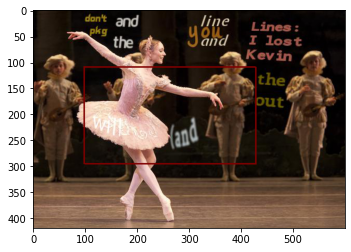

In [18]:
im = Image.open(ROOT_PATH+"8/ballet_106_0.jpg")  #443 128 501 169
draw = ImageDraw.Draw(im) 
draw.rectangle((
         427.52274  , 296.86508  ,  99.56819  , 108.96211 ), width = 3,outline = 128)
plt.imshow(im)

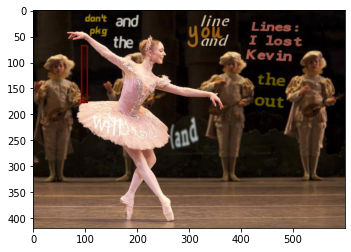

In [19]:
# 420,21,512,23
im = Image.open(ROOT_PATH+"8/ballet_106_0.jpg")  
draw = ImageDraw.Draw(im) 
draw.rectangle(( 103, 178, 94, 67 ), width = 3,outline = 128)
# draw.rectangle(( 511, 41, 420, 39 ), width = 3,outline = 128)

plt.imshow(im)

In [20]:
# 8/ballet_106_0.jpg,420,21,512,23,511,41,420,39,["don't", '']
# 8/ballet_106_0.jpg,418,46,431,48,428,68,415,66,["don't", '']
# 8/ballet_106_0.jpg,448,47,519,50,518,70,447,67,["don't", '']
# 8/ballet_106_0.jpg,410,73,499,77,499,98,409,95,["don't", '']
# 8/ballet_106_0.jpg,117,197,179,208,172,245,110,233,["don't", '']
# 8/ballet_106_0.jpg,322,9,377,8,378,30,322,31,["don't", '']
# 8/ballet_106_0.jpg,322,48,376,46,377,68,323,70,["don't", '']
# 8/ballet_106_0.jpg,159,9,203,9,203,32,158,31,["don't", '']
# 8/ballet_106_0.jpg,154,49,193,50,193,73,153,72,["don't", '']
# 8/ballet_106_0.jpg,260,208,313,203,319,264,266,269,["don't", '']
# 8/ballet_106_0.jpg,431,118,487,122,485,147,430,143,["don't", '']
# 8/ballet_106_0.jpg,427,162,484,168,482,189,425,184,["don't", '']
# 8/ballet_106_0.jpg,296,29,365,29,365,72,296,71,["don't", '']

# 8/ballet_106_25.jpg,415,245,518,246,517,304,415,303,['the']
# 8/ballet_106_25.jpg,73,5,194,7,193,42,72,40,['the']
# 8/ballet_106_25.jpg,248,253,309,247,315,310,254,316,['the']
# 8/ballet_106_25.jpg,493,353,577,355,576,385,492,383,['the']
# 8/ballet_106_25.jpg,490,386,580,387,580,410,490,410,['the']
# 8/ballet_106_25.jpg,410,246,426,242,432,266,416,270,['the']
# 8/ballet_106_25.jpg,439,253,484,249,486,270,440,274,['the']
# 8/ballet_106_25.jpg,144,45,199,46,198,70,143,68,['the']
# 8/ballet_106_25.jpg,258,214,304,204,311,238,266,248,['the']

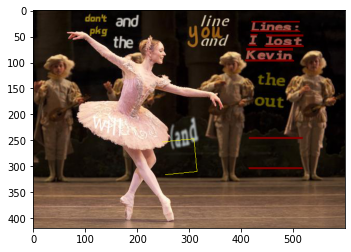

In [21]:
im = Image.open(ROOT_PATH+"8/ballet_106_0.jpg")  
draw = ImageDraw.Draw(im) 
draw.rectangle(( 420,21,512,23 ), width = 3,outline = 128)
draw.rectangle(( 511, 41, 420, 39 ), width = 3,outline = 128)
draw.rectangle(( 418,46,431,48 ), width = 3,outline = 128)
draw.rectangle(( 428,68,415,66 ), width = 3,outline = 128)
draw.rectangle(( 448,47,519,50 ), width = 3,outline = 128)
draw.rectangle(( 518,70,447,67 ), width = 3,outline = 128)
draw.rectangle(( 410,73,499,77 ), width = 3,outline = 128)
draw.rectangle(( 499,98,409,95 ), width = 3,outline = 128)
draw.rectangle(( 517,304,415,303 ), width = 3,outline = 128)
draw.rectangle(( 415,245,518,246 ), width = 3,outline = 128)
draw.line((248,253,309,247,315,310,254,316), fill=(255, 255, 0))
# draw.rectangle(( 420,21,512,23 ), width = 3,outline = 128)
# draw.rectangle(( 511, 41, 420, 39 ), width = 3,outline = 128)
plt.imshow(im)

(419, 600, 3)


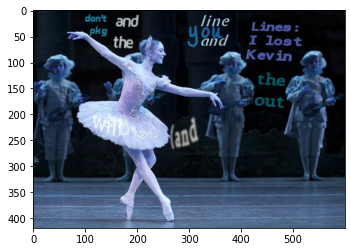

In [22]:
import PIL
# im = PIL.Image.open(ROOT_PATH+"8/ballet_106_0.jpg").convert('RGB') 
im = cv2.imread(ROOT_PATH+"8/ballet_106_0.jpg")
print(im.shape)
plt.imshow(im)

In [23]:
# print(im)
# gt_mat['imnames'][0][0]

In [24]:
bb_list = gt_mat['wordBB'][0][0]
print(bb_list)

[[[420.58957  418.85016  448.08478  410.3094   ... 427.52274  296.86508   99.56819  108.96211 ]
  [512.3321   431.88342  519.4515   499.81183  ... 484.64633  365.83176  142.49403  144.90457 ]
  [511.92203  428.7077   518.7375   499.0373   ... 482.571    365.76303  142.31898  144.43858 ]
  [420.1795   415.67444  447.3708   409.53485  ... 425.44742  296.79636   99.39314  108.49613 ]]

 [[ 21.06382   46.19922   47.570374  73.95366  ... 162.82489   29.548729   5.800581  28.812992]
  [ 23.069519  48.254295  50.130234  77.18146  ... 168.38647   29.660484   6.255859  29.602367]
  [ 41.827087  68.39458   70.03627   98.65903  ... 189.70224   72.08      22.759935  50.81941 ]
  [ 39.82139   66.3395    67.47641   95.43123  ... 184.14066   71.96825   22.304657  50.030033]]]


In [25]:
im = Image.open(ROOT_PATH+"8/ballet_106_0.jpg")  #443 128 501 169
# draw = ImageDraw.Draw(im) 
# draw.rectangle((
#          427.52274  ,
#          296.86508  ,  99.56819  , 108.96211 ), width = 3,outline = 128)
# plt.imshow(im)

In [26]:
def viz_textbb(fignum,text_im, bb_list,alpha=1.0):
    """
    text_im : image containing text
    bb_list : list of 2x4xn_i boundinb-box matrices
    """
    plt.close(fignum)
    plt.figure(fignum)
    plt.imshow(text_im)
#     plt.hold(True)
#     H,W = text_im.shape[:2]
#     print(H,W)
    for i in range(len(bb_list)):
        bbs = bb_list[i]
#         print(bbs)
        ni = bbs.shape[-1]
#         print(ni)
        for j in range(ni):
            bb = bbs[:, j]
#             print(bb)
            
            draw = ImageDraw.Draw(im) 
            draw.rectangle((list(bb)), width = 3,outline = 128)
            plt.imshow(im)
            
#             bb = np.c_[bb,bb[:,0]]
#             plt.plot(bb[0,:], bb[1,:], 'r', linewidth=2, alpha=alpha)
#     plt.gca().set_xlim([0,W-1])
#     plt.gca().set_ylim([H-1,0])
#     plt.show(block=True)
    
    

In [27]:
fignum = ROOT_PATH+"8/ballet_106_0.jpg"

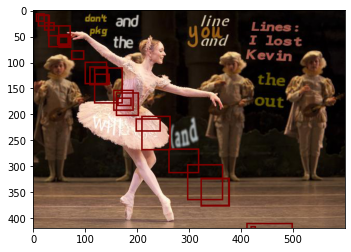

In [28]:
viz_textbb(fignum,im, bb_list)

In [29]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai import *
from fastai.vision import *
# from fastai.vision.all import *
from fastai import *
from fastai.vision import *
from fastai.vision import *
# from fastai.callbacks import *
import torch
# import coco_text
# from pathlib import Path


In [30]:
path = Path("./SynthText")
mat_file = path/'gt.mat'

In [31]:
# get the (non-rotated) bounding boxes of one image
# actually the bounding boxes in the dataset are four points (rotated bboxes)
# in fastai the bounding boxes are non-rotated bounding boxes
def get_bboxes(img_id):
    bboxes = gt_mat['wordBB'][0][img_id]
    xs = bboxes[0].transpose()
    ys = bboxes[1].transpose()
    bbxs = []
    for i in range(0,len(xs)):
        ixs = xs[i]
        iys = ys[i]
        try:
            bbxs.append( [int(min(ixs)),int(min(iys)),int(max(ixs)-min(ixs)),int(max(iys)-min(iys))] )
        except:
            # Some images, eg 92 only have one bounding box, they are structured differ
            return [[int(min(xs)), int(min(ys)), int(max(xs)-min(xs)), int(max(ys)-min(ys))]]
    return bbxs

In [32]:
get_bboxes(93)

[[404, 263, 82, 44],
 [455, 351, 110, 58],
 [254, 183, 93, 77],
 [269, 264, 80, 49],
 [403, 238, 61, 23],
 [295, 371, 123, 39],
 [347, 12, 44, 36]]

In [33]:
get_bboxes(92)

[[412, 32, 110, 23]]

<AxesSubplot:>

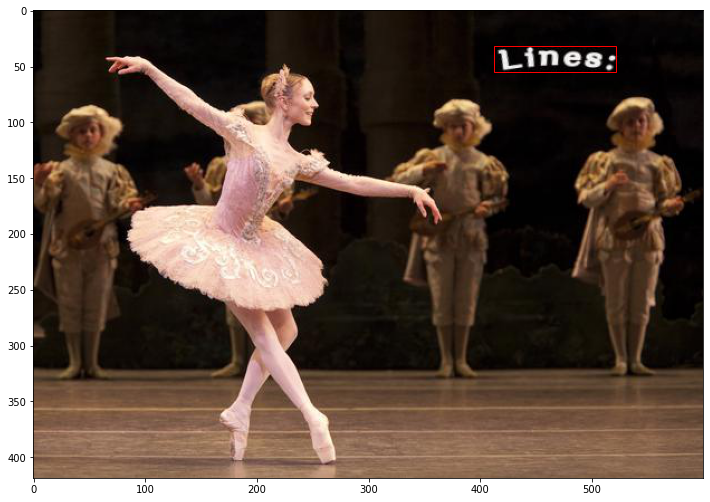

In [37]:
# Testing: show image with bounding boxes
imageId = 92
img_name = gt_mat['imnames'][0][imageId][0]

img = open_image(path/img_name)

fig,ax = plt.subplots(figsize=(12,12))
ax.imshow(image2np(img.data))
bboxes = get_bboxes(imageId)

for bbox in bboxes:
    ax.add_patch(patches.Rectangle((bbox[0],bbox[1]),bbox[2],bbox[3], color='red',fill=None))
ax

<AxesSubplot:>

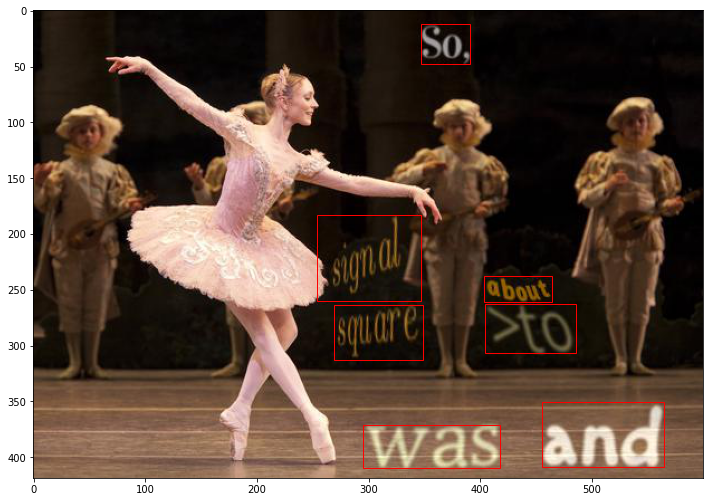

In [43]:
# Testing: show an image with bounding box
imageId = 93
img_name = gt_mat['imnames'][0][imageId][0]
img = open_image(path/img_name)
fig,ax = plt.subplots(figsize=(12,12))
ax.imshow(image2np(img.data))
bboxes = get_bboxes(imageId)
for bbox in bboxes:
    ax.add_patch(patches.Rectangle((bbox[0],bbox[1]),bbox[2],bbox[3], color='red', fill=None))
ax

<AxesSubplot:>

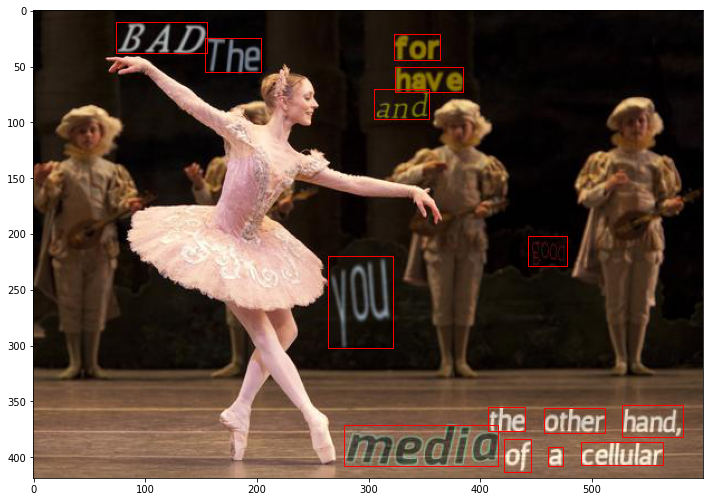

In [42]:
# Testing: show an image with bounding box
imageId = 21
img_name = gt_mat['imnames'][0][imageId][0]
img = open_image(path/img_name)
fig,ax = plt.subplots(figsize=(12,12))
ax.imshow(image2np(img.data))
bboxes = get_bboxes(imageId)
for bbox in bboxes:
    ax.add_patch(patches.Rectangle((bbox[0],bbox[1]),bbox[2],bbox[3], color='red', fill=None))
ax

In [46]:
# get the (non-rotated) bounding boxes of one image
# actually the bounding boxes in the dataset are four points (rotated bboxes)
# in fastai the bounding boxes are non-rotated bounding boxes
def get_bboxes_char(img_id):
    bboxes = gt_mat['charBB'][0][img_id]
    xs = bboxes[0].transpose()
    ys = bboxes[1].transpose()
    bbxs = []
    for i in range(0,len(xs)):
        ixs = xs[i]
        iys = ys[i]
        try:
            bbxs.append( [int(min(ixs)),int(min(iys)),int(max(ixs)-min(ixs)),int(max(iys)-min(iys))] )
        except:
            # Some images, eg 92 only have one bounding box, they are structured differ
            return [[int(min(xs)), int(min(ys)), int(max(xs)-min(xs)), int(max(ys)-min(ys))]]
    return bbxs

In [47]:
get_bboxes_char(92)

[[412, 35, 28, 19],
 [437, 33, 14, 18],
 [451, 36, 21, 14],
 [474, 36, 17, 14],
 [493, 37, 17, 14],
 [512, 39, 10, 14]]

8/ballet_106_83.jpg


<AxesSubplot:>

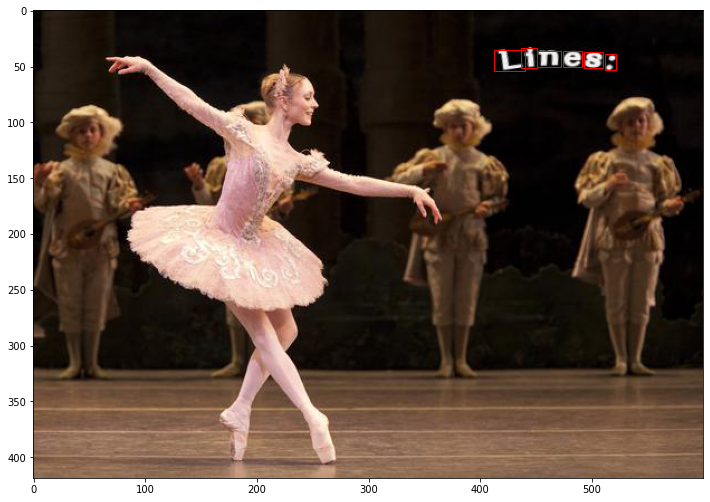

In [49]:
# Testing: show image with bounding boxes
imageId = 92
img_name = gt_mat['imnames'][0][imageId][0]
print(img_name)
img = open_image(path/img_name)

fig,ax = plt.subplots(figsize=(12,12))
ax.imshow(image2np(img.data))
bboxes = get_bboxes_char(imageId)

for bbox in bboxes:
    ax.add_patch(patches.Rectangle((bbox[0],bbox[1]),bbox[2],bbox[3], color='red',fill=None))
ax

In [62]:
# gt_mat['txt'][0][0]
print(gt_mat['imnames'][0][93][0])
# print(gt_mat['wordBB'][0][93][0])
# print(gt_mat['charBB'][0][93][0])
print(gt_mat['txt'][0][93][0])
print(len(gt_mat['txt'][0][93]))

8/ballet_106_84.jpg
>to          
6
